## Project Description

OpenAI describes DALL·E 2 as "an AI system that can create realistic images and art from a description in natural language."  It is an oustanding tool, which allows creating images within seconds.

### Objective
Objective of this project is to test DALL·E 2 in generating image, based on text prompt and to create variations of the generated image.


## References:

1. OpenAI Documentation on Image Generation is available at [this link](https://platform.openai.com/docs/guides/images).

2. Tutorial "Generate Images With DALL·E 2 and the OpenAI API" by Martin Breuss is available at [the following link](https://realpython.com/generate-images-with-dalle-openai-api/).

## Project Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.getcwd()
os.chdir('your-path')

In [ ]:
!pip install -q openai

In [ ]:
# importing openai
import openai

# importing other libraries
import requests
import urllib.request
from PIL import Image
import json
from pathlib import Path
from base64 import b64decode
from IPython.display import Image, display
from io import BytesIO
import matplotlib.pyplot as plt


In [ ]:
# please sign up at openai.com, create an account, within your account in the section "View API Keys" you can generate your API key:
openai.api_key = 'your-api-key'

In [ ]:
# let's create function to generate images, based on prompt:

def generate_and_display_image(prompt):

    response = openai.Image.create(
        prompt=prompt,
        n=1,
        response_format='url',
        size='512x512'
    )

    # Save the images locally and display in the notebook
    if "data" in response:
        for key, obj in enumerate(response["data"]):
            filename = 'image_' + str(key) + ".jpg"
            urllib.request.urlretrieve(obj['url'], filename)
            img = Image.open(filename)
            display(img)
        print('Images have been generated and displayed inline in the notebook')
    else:
        print("Failed to generate image")

In [ ]:
# example of generating image, based on prompt:
prompt = "Pixar style 3D render of a baby tucan, high resolution"
generate_and_display_image(prompt)

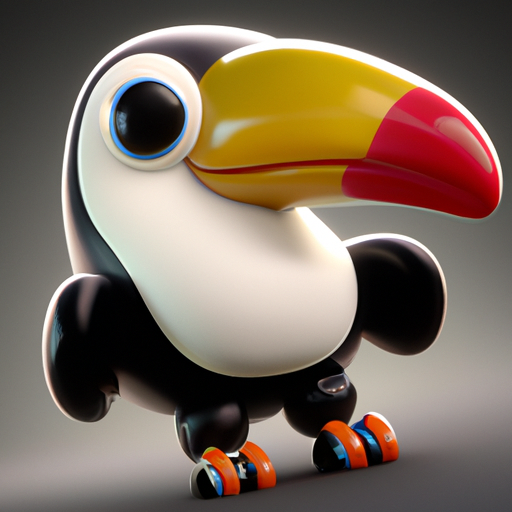

In [ ]:
from IPython import display
display.Image('image.jpg')
# displaying the best generated image:

## Image Variations

In [ ]:
# now let's generate variations of the created image:

def generate_variations(image_path):
    # Read the image from file
    with open(image_path, "rb") as f:
        image_data = f.read()

    # Generate variations using OpenAI API
    response = openai.Image.create_variation(
        image=image_data,
        n=3,
        size="256x256",
        response_format="url",
    )

        # Save the images locally and display in the notebook
    if "data" in response:
        for key, obj in enumerate(response["data"]):
            filename = 'image_' + str(key) + ".jpg"
            urllib.request.urlretrieve(obj['url'], filename)
            img = Image.open(filename)
            display(img)

        print('Images have been generated and displayed inline in the notebook')
    else:
        print("Failed to generate image")



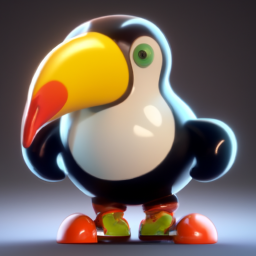

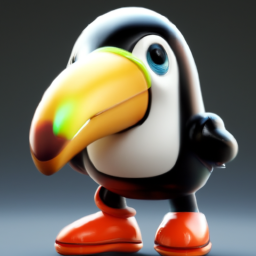

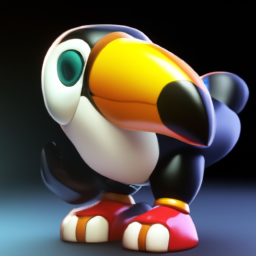

Images have been generated and displayed inline in the notebook


In [ ]:
# example of creating variations:

image_path = Path.cwd()/"image.jpg"
generate_variations(image_path)